In [100]:
import pandas as pd

dataset = pd.read_csv('datasets/dataset.csv')
dataset = dataset.astype(str)
display(dataset.head())
dataset.shape

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,11,15,18,19,20,21,22,23,24,28,30,31,32,33,35,36,37,38,39,40,41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,PET_MPIO,PET_TIPOPER,PQR_CANAL,PQR_CLASE_SNS,PQR_ESTADO,PQR_GRUPOALERTA,PQR_TIPOATENCION,PQR_TIPOPETICION,RIESGO_VIDA,TRIM
0,bogota d.c.,de 13 a 17 años,ninguno,mujer,no aplica,bogotá,otro,no aplica,subsidiado,natural,...,bogotá,juridica,escrito,pqr,cerrado,0,peticion directa,reclamo,no,trim i
1,nariño,de 0 a 5 años,ninguno,hombre,no aplica,puerres,otro,no aplica,subsidiado,natural,...,puerres,natural,telefonico,pqr,cerrado,0,0,reclamo,no,trim i
2,valle,de 13 a 17 años,secundaria,hombre,no aplica,cali,abuelo (a),no aplica,contributivo,natural,...,cali,natural,telefonico,pqr,cerrado,0,0,reclamo,no,trim i
3,huila,de 13 a 17 años,universitario incompleto,hombre,no aplica,neiva,padre,no aplica,contributivo,natural,...,neiva,natural,personalizado,pqr,cerrado,0,0,reclamo,no,trim i
4,risaralda,de 13 a 17 años,ninguno,hombre,no aplica,dosquebradas,padre,persona en condición de discapacidad,contributivo,natural,...,dosquebradas,natural,personalizado,pqr,pendiente (avance),0,0,reclamo,si,trim i


(2375371, 46)

In [101]:
cie10_df = pd.read_csv('datasets/CIE10.csv', sep = ';')
cie10_df.head()

,CAPITULO,NOMBRE_CAPITULO,COD_CIE_10_03,DESCRIPCION_COD_CIE_10_03,COD_CIE_10_04,DESCRIPCION_COD_CIE_10_04,SEXO,LIMITE_INFERIOR_EDAD,LIMITE_SUPERIOR_EDAD
0,1,Ciertas enfermedades infecciosas y parasitarias,A00,Colera,A000,"Colera debido a Vibrio cholerae 01, biotipo ch...",NaN,NaN,NaN
1,1,Ciertas enfermedades infecciosas y parasitarias,A00,Colera,A001,"Colera debido a Vibrio cholerae 01, biotipo el...",NaN,NaN,NaN
2,1,Ciertas enfermedades infecciosas y parasitarias,A00,Colera,A009,"Colera, no especificado",NaN,NaN,NaN
3,1,Ciertas enfermedades infecciosas y parasitarias,A01,Fiebres Tifoidea Y Paratifoidea,A010,Fiebre tifoidea,NaN,NaN,NaN
4,1,Ciertas enfermedades infecciosas y parasitarias,A01,Fiebres Tifoidea Y Paratifoidea,A011,Fiebre paratifoidea A,NaN,NaN,NaN


In [102]:
set(cie10_df['CAPITULO'].values)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22}

In [103]:
cie10_df['DESCRIPCION_COD_CIE_10_04'] = cie10_df['DESCRIPCION_COD_CIE_10_04'].apply(lambda value: value.lower())
cie10_df.head()

,CAPITULO,NOMBRE_CAPITULO,COD_CIE_10_03,DESCRIPCION_COD_CIE_10_03,COD_CIE_10_04,DESCRIPCION_COD_CIE_10_04,SEXO,LIMITE_INFERIOR_EDAD,LIMITE_SUPERIOR_EDAD
0,1,Ciertas enfermedades infecciosas y parasitarias,A00,Colera,A000,"colera debido a vibrio cholerae 01, biotipo ch...",NaN,NaN,NaN
1,1,Ciertas enfermedades infecciosas y parasitarias,A00,Colera,A001,"colera debido a vibrio cholerae 01, biotipo el...",NaN,NaN,NaN
2,1,Ciertas enfermedades infecciosas y parasitarias,A00,Colera,A009,"colera, no especificado",NaN,NaN,NaN
3,1,Ciertas enfermedades infecciosas y parasitarias,A01,Fiebres Tifoidea Y Paratifoidea,A010,fiebre tifoidea,NaN,NaN,NaN
4,1,Ciertas enfermedades infecciosas y parasitarias,A01,Fiebres Tifoidea Y Paratifoidea,A011,fiebre paratifoidea a,NaN,NaN,NaN


In [104]:
dataset_cie10 = pd.merge(left = dataset, right = cie10_df, how = 'left', left_on='CIE_10', right_on='DESCRIPCION_COD_CIE_10_04')

print(dataset_cie10.shape)
dataset_cie10.head()

(2375424, 55)


,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,TRIM,CAPITULO,NOMBRE_CAPITULO,COD_CIE_10_03,DESCRIPCION_COD_CIE_10_03,COD_CIE_10_04,DESCRIPCION_COD_CIE_10_04,SEXO,LIMITE_INFERIOR_EDAD,LIMITE_SUPERIOR_EDAD
0,bogota d.c.,de 13 a 17 años,ninguno,mujer,no aplica,bogotá,otro,no aplica,subsidiado,natural,...,trim i,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,nariño,de 0 a 5 años,ninguno,hombre,no aplica,puerres,otro,no aplica,subsidiado,natural,...,trim i,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,valle,de 13 a 17 años,secundaria,hombre,no aplica,cali,abuelo (a),no aplica,contributivo,natural,...,trim i,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,huila,de 13 a 17 años,universitario incompleto,hombre,no aplica,neiva,padre,no aplica,contributivo,natural,...,trim i,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,risaralda,de 13 a 17 años,ninguno,hombre,no aplica,dosquebradas,padre,persona en condición de discapacidad,contributivo,natural,...,trim i,6.0,Enfermedades del sistema nervioso,G40,Epilepsia,G403,epilepsia y sindromes epilepticos idiopaticos ...,NaN,NaN,NaN


In [105]:
import numpy as np

cie10_columns = [
    'CAPITULO', 
    'NOMBRE_CAPITULO', 
    'COD_CIE_10_03', 
    'DESCRIPCION_COD_CIE_10_03', 
    'COD_CIE_10_04', 
    'DESCRIPCION_COD_CIE_10_04', 
    'SEXO', 
    'LIMITE_INFERIOR_EDAD', 
    'LIMITE_SUPERIOR_EDAD']

dataset_cie10[cie10_columns] = dataset_cie10[cie10_columns].replace(np.nan, 'no_cie10', regex=True)
dataset_cie10 = dataset_cie10[dataset_cie10['NOMBRE_CAPITULO'] != 'no_cie10']
print(dataset_cie10.shape)
dataset_cie10.head()

(175360, 55)


,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,TRIM,CAPITULO,NOMBRE_CAPITULO,COD_CIE_10_03,DESCRIPCION_COD_CIE_10_03,COD_CIE_10_04,DESCRIPCION_COD_CIE_10_04,SEXO,LIMITE_INFERIOR_EDAD,LIMITE_SUPERIOR_EDAD
4,risaralda,de 13 a 17 años,ninguno,hombre,no aplica,dosquebradas,padre,persona en condición de discapacidad,contributivo,natural,...,trim i,6,Enfermedades del sistema nervioso,G40,Epilepsia,G403,epilepsia y sindromes epilepticos idiopaticos ...,no_cie10,no_cie10,no_cie10
7,santander,de 13 a 17 años,secundaria,hombre,no aplica,bucaramanga,padre,no aplica,contributivo,natural,...,trim i,19,"Traumatismos, envenenamiento y algunas otras c...",S83,"Luxacion, Esguince Y Torcedura De Articulacion...",S833,desgarro del cartilago articular de la rodilla...,no_cie10,no_cie10,no_cie10
18,tolima,de 13 a 17 años,posgrado,hombre,no aplica,ibagué,padre,no aplica,régimen especial,natural,...,trim i,17,"Malformaciones congenitas, deformidades y anom...",Q87,Otros Sindromes De Malformaciones Congenitas E...,Q874,sindrome de marfan,no_cie10,no_cie10,no_cie10
19,santander,de 6 a 12 años,ninguno,mujer,no aplica,barrancabermeja,madre,persona en condición de discapacidad,contributivo,natural,...,trim i,13,Enfermedades del sistema osteomuscular y del t...,M72,Trastornos Fibroblasticos,M724,fibromatosis seudosarcomatosa,no_cie10,no_cie10,no_cie10
22,bogota d.c.,de 6 a 12 años,ninguno,hombre,no aplica,bogotá,nombre propio,no aplica,contributivo,natural,...,trim i,21,Factores que influyen en el estado de salud y ...,Z75,Problemas Relacionados Con Facilidades De Aten...,Z758,otros problemas relacionados con servicios med...,no_cie10,no_cie10,no_cie10


In [106]:
for column in dataset.columns:
    dataset_cie10[column] = dataset_cie10[column].apply(lambda value: '999' if value == 0 or value == '0' or value == 'nan' else value)     

dataset_cie10 = dataset_cie10[dataset_cie10['RIESGO_VIDA'] != '999']
dataset_cie10.head()


,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,TRIM,CAPITULO,NOMBRE_CAPITULO,COD_CIE_10_03,DESCRIPCION_COD_CIE_10_03,COD_CIE_10_04,DESCRIPCION_COD_CIE_10_04,SEXO,LIMITE_INFERIOR_EDAD,LIMITE_SUPERIOR_EDAD
4,risaralda,de 13 a 17 años,ninguno,hombre,no aplica,dosquebradas,padre,persona en condición de discapacidad,contributivo,natural,...,trim i,6,Enfermedades del sistema nervioso,G40,Epilepsia,G403,epilepsia y sindromes epilepticos idiopaticos ...,no_cie10,no_cie10,no_cie10
7,santander,de 13 a 17 años,secundaria,hombre,no aplica,bucaramanga,padre,no aplica,contributivo,natural,...,trim i,19,"Traumatismos, envenenamiento y algunas otras c...",S83,"Luxacion, Esguince Y Torcedura De Articulacion...",S833,desgarro del cartilago articular de la rodilla...,no_cie10,no_cie10,no_cie10
18,tolima,de 13 a 17 años,posgrado,hombre,no aplica,ibagué,padre,no aplica,régimen especial,natural,...,trim i,17,"Malformaciones congenitas, deformidades y anom...",Q87,Otros Sindromes De Malformaciones Congenitas E...,Q874,sindrome de marfan,no_cie10,no_cie10,no_cie10
19,santander,de 6 a 12 años,ninguno,mujer,no aplica,barrancabermeja,madre,persona en condición de discapacidad,contributivo,natural,...,trim i,13,Enfermedades del sistema osteomuscular y del t...,M72,Trastornos Fibroblasticos,M724,fibromatosis seudosarcomatosa,no_cie10,no_cie10,no_cie10
22,bogota d.c.,de 6 a 12 años,ninguno,hombre,no aplica,bogotá,nombre propio,no aplica,contributivo,natural,...,trim i,21,Factores que influyen en el estado de salud y ...,Z75,Problemas Relacionados Con Facilidades De Aten...,Z758,otros problemas relacionados con servicios med...,no_cie10,no_cie10,no_cie10


In [107]:
set(dataset_cie10['AFEC_EDADR'].values)

{'999',
 'de 0 a 5 años',
 'de 13 a 17 años',
 'de 18 a 24 años',
 'de 25 a 29 años',
 'de 30 a 37 años',
 'de 38 a 49 años',
 'de 50 a 62 años',
 'de 6 a 12 años',
 'mayor de 63 años'}

In [108]:
set(dataset_cie10['LIMITE_INFERIOR_EDAD'].values)

{'000H',
 '001A',
 '002A',
 '002M',
 '004A',
 '005A',
 '006A',
 '006M',
 '010A',
 '012A',
 '015A',
 '016A',
 '018A',
 '020A',
 '025A',
 '028D',
 '030A',
 '050A',
 '055A',
 '065A',
 'no_cie10'}

In [109]:
set(dataset_cie10['LIMITE_SUPERIOR_EDAD'].values)

{'008A',
 '009A',
 '011M',
 '0120A',
 '014A',
 '015A',
 '017A',
 '018A',
 '021A',
 '025A',
 '027D',
 '035A',
 '054A',
 '064A',
 '080A',
 '085A',
 '120A',
 'no_cie10'}

In [110]:
set(dataset_cie10['AFEC_GENERO'].values)

{'999', 'hombre', 'mujer'}

In [111]:
set(dataset_cie10['SEXO'].values)

{1.0, 2.0, 'no_cie10'}

In [112]:

def to_year(value_range):
    if(value_range == 'no_cie10'):
        return -1
    
    num = int(value_range[:3])
    unit = value_range[-1]
    
    map_unit = {
        'A': num,
        'M': num / 12,
        'D': num / 365,
        'H': num / 8760
    }
    return int(map_unit[unit])

def get_edad_inf(value):
    value_range = {
        '999': -1,
        'de 0 a 5 años': 0,
        'de 13 a 17 años': 13,
        'de 18 a 24 años': 18,
        'de 25 a 29 años': 25,
        'de 30 a 37 años': 30,
        'de 38 a 49 años': 38,
        'de 50 a 62 años': 50,
        'de 6 a 12 años': 6,
        'mayor de 63 años': 63
            }
    return value_range[value]

def get_edad_sup(value):
    value_range = {
        '999': -1,
        'de 0 a 5 años': 5,
        'de 13 a 17 años': 17,
        'de 18 a 24 años': 24,
        'de 25 a 29 años': 29,
        'de 30 a 37 años': 37,
        'de 38 a 49 años': 49,
        'de 50 a 62 años': 62,
        'de 6 a 12 años': 12,
        'mayor de 63 años': 120
            }
    return value_range[value]

def in_range(row):
    return row['AFEC_EDADR_INF'] >= row['LIMITE_INFERIOR_EDAD_Y'] and  row['AFEC_EDADR_SUP'] < row['LIMITE_SUPERIOR_EDAD_Y']

def cie10_sexo(value):
    if(value == 1 or value == 2):
        return True
    return False


In [113]:
dataset_cie10['CIE10_SEXO'] = dataset_cie10['SEXO'].apply(cie10_sexo)

In [114]:
dataset_cie10['LIMITE_INFERIOR_EDAD_Y'] = dataset_cie10['LIMITE_INFERIOR_EDAD'].apply(to_year)
dataset_cie10['LIMITE_SUPERIOR_EDAD_Y'] = dataset_cie10['LIMITE_SUPERIOR_EDAD'].apply(to_year)
dataset_cie10['AFEC_EDADR_INF'] = dataset_cie10['AFEC_EDADR'].apply(get_edad_inf)
dataset_cie10['AFEC_EDADR_SUP'] = dataset_cie10['AFEC_EDADR'].apply(get_edad_sup)

dataset_cie10['CIE10_RANGO_EDAD'] = dataset_cie10.apply(in_range, axis=1)



In [115]:
dataset_cie10 = dataset_cie10.drop(
    [
        'SEXO',
        'LIMITE_INFERIOR_EDAD', 
        'LIMITE_SUPERIOR_EDAD', 
        'LIMITE_INFERIOR_EDAD_Y', 
        'LIMITE_SUPERIOR_EDAD_Y',

    ], axis = 1
)



In [117]:
dataset_cie10[
    [
        'AFEC_GENERO',
        'CIE10_SEXO',
        'AFEC_EDADR', 
        'CIE10_RANGO_EDAD',
        'AFEC_EDADR_INF', 
        'AFEC_EDADR_SUP',

    ]
]


,AFEC_GENERO,CIE10_SEXO,AFEC_EDADR,CIE10_RANGO_EDAD,AFEC_EDADR_INF,AFEC_EDADR_SUP
4,hombre,False,de 13 a 17 años,False,13,17
7,hombre,False,de 13 a 17 años,False,13,17
18,hombre,False,de 13 a 17 años,False,13,17
19,mujer,False,de 6 a 12 años,False,6,12
22,hombre,False,de 6 a 12 años,False,6,12
28,mujer,False,de 6 a 12 años,False,6,12
31,hombre,False,de 6 a 12 años,False,6,12
42,hombre,False,de 13 a 17 años,False,13,17
46,mujer,False,de 13 a 17 años,True,13,17
49,mujer,False,de 13 a 17 años,False,13,17


In [8]:
dataset_cie10.columns

Index(['AFEC_DPTO', 'AFEC_EDADR', 'AFEC_EDUC', 'AFEC_GENERO', 'AFEC_GETNICO',
       'AFEC_MPIO', 'AFEC_PARENTESCO', 'AFEC_POBESPECIAL',
       'AFEC_REGAFILIACION', 'AFEC_TIPOPER', 'ALTO_COSTO', 'CIE_10',
       'COD_MACROMOT', 'COD_MOTESP', 'COD_MOTGEN', 'ENT_AMBITOIVC',
       'ENT_COD_DEPTO', 'ENT_COD_MPIO', 'ENT_COD_SNS', 'ENT_DPTO', 'ENT_MPIO',
       'ENT_MPIO_DANE', 'ENT_NOMBRE', 'ENT_TIPOVIG', 'ENT_TIPOVIG_SNS',
       'IDPATOLOGIA_2', 'IDRANGOEDADES', 'ID_MES', 'MACROMOTIVO', 'MES',
       'MOTIVO_ESPECIFICO', 'MOTIVO_GENERAL', 'PATOLOGIA_1', 'PATOLOGIA_TIPO',
       'PET_COD_DEPTO', 'PET_DPTO', 'PET_MPIO', 'PET_TIPOPER', 'PQR_CANAL',
       'PQR_CLASE_SNS', 'PQR_ESTADO', 'PQR_GRUPOALERTA', 'PQR_TIPOATENCION',
       'PQR_TIPOPETICION', 'RIESGO_VIDA', 'TRIM', 'CAPITULO',
       'NOMBRE_CAPITULO', 'COD_CIE_10_03', 'DESCRIPCION_COD_CIE_10_03',
       'COD_CIE_10_04', 'DESCRIPCION_COD_CIE_10_04', 'SEXO',
       'LIMITE_INFERIOR_EDAD', 'LIMITE_SUPERIOR_EDAD'],
      dtype='object

In [9]:
set(dataset_cie10['RIESGO_VIDA'].values)

{'no', 'si'}

In [10]:
riesgo_vida_si = dataset_cie10[(dataset_cie10['RIESGO_VIDA'] == 'si') & (dataset_cie10['CIE_10'] != '999')]
riesgo_vida_no = dataset_cie10[(dataset_cie10['RIESGO_VIDA'] == 'no') & (dataset_cie10['CIE_10'] != '999')]



In [11]:
riesgo_vida_si['NOMBRE_CAPITULO'].value_counts().nlargest(n=10, keep='first').plot(kind='bar', title='CIE_10');

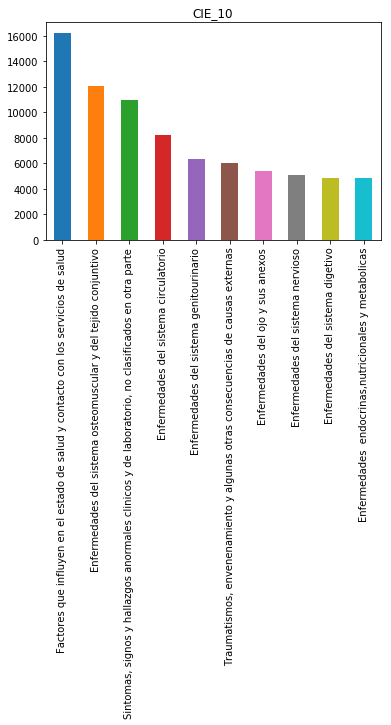

In [12]:
riesgo_vida_no['NOMBRE_CAPITULO'].value_counts().nlargest(n=10, keep='first').plot(kind='bar', title='CIE_10');

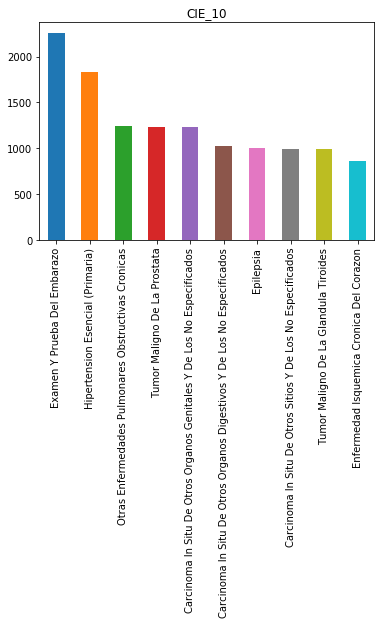

In [13]:
riesgo_vida_si['DESCRIPCION_COD_CIE_10_03'].value_counts().nlargest(n=10, keep='first').plot(kind='bar', title='CIE_10');

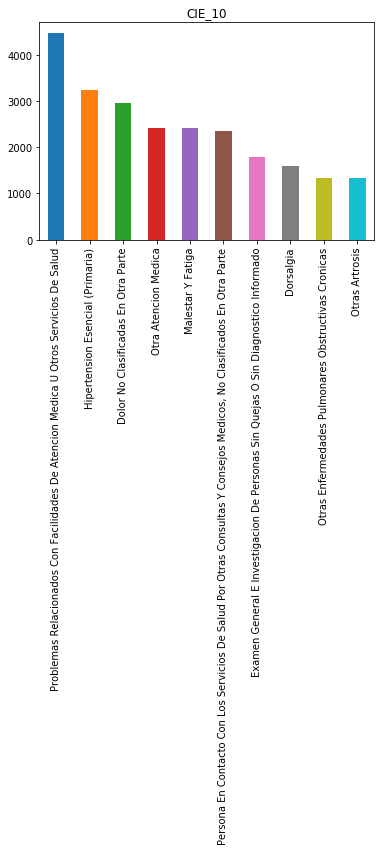

In [14]:
riesgo_vida_no['DESCRIPCION_COD_CIE_10_03'].value_counts().nlargest(n=10, keep='first').plot(kind='bar', title='CIE_10');


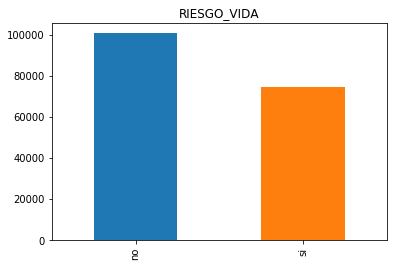

In [15]:
dataset_cie10['RIESGO_VIDA'].value_counts().nlargest(n=10, keep='first').plot(kind='bar', title='RIESGO_VIDA');

In [16]:
dataset_cie10['SEXO'] = dataset_cie10['SEXO'].astype(str)

In [118]:
set(dataset_cie10['AFEC_EDADR'].values)

{'999',
 'de 0 a 5 años',
 'de 13 a 17 años',
 'de 18 a 24 años',
 'de 25 a 29 años',
 'de 30 a 37 años',
 'de 38 a 49 años',
 'de 50 a 62 años',
 'de 6 a 12 años',
 'mayor de 63 años'}

In [123]:
from category_encoders.ordinal import OrdinalEncoder

ordinal_cols_mapping = [{
    "col":"AFEC_EDADR",    
    "mapping": [
        ('de 0 a 5 años',0), 
        ('de 6 a 12 años',1), 
        ('de 13 a 17 años',3), 
        ('de 18 a 24 años',4), 
        ('de 25 a 29 años',5), 
        ('de 30 a 37 años',6), 
        ('de 38 a 49 años',7), 
        ('de 50 a 62 años',8), 
        ('mayor de 63 años',9), 
        ('999',999)
    ]},
]

encoder = OrdinalEncoder(mapping = ordinal_cols_mapping, 
                         return_df = True)  
dataset_cie10[['AFEC_EDADR']] = encoder.fit_transform(dataset_cie10[['AFEC_EDADR']])
dataset_cie10[['AFEC_EDADR']].head()

,AFEC_EDADR
4,3
7,3
18,3
19,1
22,1
28,1
31,1
42,3
46,3
49,3


In [124]:
set(dataset_cie10['AFEC_EDUC'].values)

{'999',
 'ninguno',
 'posgrado',
 'primaria',
 'primaria incompleta',
 'secundaria',
 'secundaria incompleta',
 'universitario',
 'universitario incompleto'}

In [125]:
ordinal_cols_mapping = [{
    "col":"AFEC_EDUC",    
    "mapping": [
        ('ninguno',0), 
        ('primaria incompleta',1), 
        ('primaria',3), 
        ('secundaria incompleta',4), 
        ('secundaria',5), 
        ('universitario incompleto',6), 
        ('universitario',7), 
        ('posgrado',8), 
        ('999',999)
    ]},
]

encoder = OrdinalEncoder(mapping = ordinal_cols_mapping, 
                         return_df = True)  
dataset_cie10[['AFEC_EDUC']] = encoder.fit_transform(dataset_cie10[['AFEC_EDUC']])
dataset_cie10[['AFEC_EDUC']].head()

,AFEC_EDUC
4,0
7,5
18,8
19,0
22,0


In [137]:
df = dataset_cie10.dtypes.to_frame(name = 'dtype')
display(df)
non_numeric_cols = list(df[(df['dtype'] == 'object') | (df['dtype'] == 'bool')].index)
non_numeric_cols

,dtype
AFEC_DPTO,object
AFEC_EDADR,int64
AFEC_EDUC,int64
AFEC_GENERO,object
AFEC_GETNICO,object
AFEC_MPIO,object
AFEC_PARENTESCO,object
AFEC_POBESPECIAL,object
AFEC_REGAFILIACION,object
AFEC_TIPOPER,object


['AFEC_DPTO',
 'AFEC_GENERO',
 'AFEC_GETNICO',
 'AFEC_MPIO',
 'AFEC_PARENTESCO',
 'AFEC_POBESPECIAL',
 'AFEC_REGAFILIACION',
 'AFEC_TIPOPER',
 'ALTO_COSTO',
 'CIE_10',
 'COD_MACROMOT',
 'COD_MOTESP',
 'COD_MOTGEN',
 'ENT_AMBITOIVC',
 'ENT_COD_DEPTO',
 'ENT_COD_MPIO',
 'ENT_COD_SNS',
 'ENT_DPTO',
 'ENT_MPIO',
 'ENT_MPIO_DANE',
 'ENT_NOMBRE',
 'ENT_TIPOVIG',
 'ENT_TIPOVIG_SNS',
 'IDPATOLOGIA_2',
 'IDRANGOEDADES',
 'ID_MES',
 'MACROMOTIVO',
 'MES',
 'MOTIVO_ESPECIFICO',
 'MOTIVO_GENERAL',
 'PATOLOGIA_1',
 'PATOLOGIA_TIPO',
 'PET_COD_DEPTO',
 'PET_DPTO',
 'PET_MPIO',
 'PET_TIPOPER',
 'PQR_CANAL',
 'PQR_CLASE_SNS',
 'PQR_ESTADO',
 'PQR_GRUPOALERTA',
 'PQR_TIPOATENCION',
 'PQR_TIPOPETICION',
 'RIESGO_VIDA',
 'TRIM',
 'CAPITULO',
 'NOMBRE_CAPITULO',
 'COD_CIE_10_03',
 'DESCRIPCION_COD_CIE_10_03',
 'COD_CIE_10_04',
 'DESCRIPCION_COD_CIE_10_04',
 'CIE10_SEXO',
 'CIE10_RANGO_EDAD']

In [138]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for column in non_numeric_cols:
    print(column)
    le.fit(dataset_cie10[column])
    dataset_cie10[column] = le.transform(dataset_cie10[column])    
    
dataset_cie10.head()


AFEC_DPTO
AFEC_GENERO
AFEC_GETNICO
AFEC_MPIO
AFEC_PARENTESCO
AFEC_POBESPECIAL
AFEC_REGAFILIACION
AFEC_TIPOPER
ALTO_COSTO
CIE_10
COD_MACROMOT
COD_MOTESP
COD_MOTGEN
ENT_AMBITOIVC
ENT_COD_DEPTO
ENT_COD_MPIO
ENT_COD_SNS
ENT_DPTO
ENT_MPIO
ENT_MPIO_DANE
ENT_NOMBRE
ENT_TIPOVIG
ENT_TIPOVIG_SNS
IDPATOLOGIA_2
IDRANGOEDADES
ID_MES
MACROMOTIVO
MES
MOTIVO_ESPECIFICO
MOTIVO_GENERAL
PATOLOGIA_1
PATOLOGIA_TIPO
PET_COD_DEPTO
PET_DPTO
PET_MPIO
PET_TIPOPER
PQR_CANAL
PQR_CLASE_SNS
PQR_ESTADO
PQR_GRUPOALERTA
PQR_TIPOATENCION
PQR_TIPOPETICION
RIESGO_VIDA
TRIM
CAPITULO
NOMBRE_CAPITULO
COD_CIE_10_03
DESCRIPCION_COD_CIE_10_03
COD_CIE_10_04
DESCRIPCION_COD_CIE_10_04
CIE10_SEXO
CIE10_RANGO_EDAD


,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,CAPITULO,NOMBRE_CAPITULO,COD_CIE_10_03,DESCRIPCION_COD_CIE_10_03,COD_CIE_10_04,DESCRIPCION_COD_CIE_10_04,CIE10_SEXO,AFEC_EDADR_INF,AFEC_EDADR_SUP,CIE10_RANGO_EDAD
4,28,3,0,1,5,313,13,5,1,2,...,5,13,443,352,1516,1424,0,13,17,0
7,31,3,5,1,5,129,13,4,1,2,...,18,20,1314,604,4940,975,0,13,17,0
18,33,3,8,1,5,468,13,4,4,2,...,16,17,1146,901,4358,4490,0,13,17,0
19,31,1,0,2,5,95,9,5,1,2,...,12,14,863,1292,3233,1706,0,6,12,0
22,7,1,0,1,5,119,11,4,1,2,...,20,16,1488,1077,5543,3606,0,6,12,0


In [154]:
dataset_cie10['AFEC_EDADR_RANGE'] = dataset_cie10['AFEC_EDADR_INF'] / dataset_cie10['AFEC_EDADR_SUP']



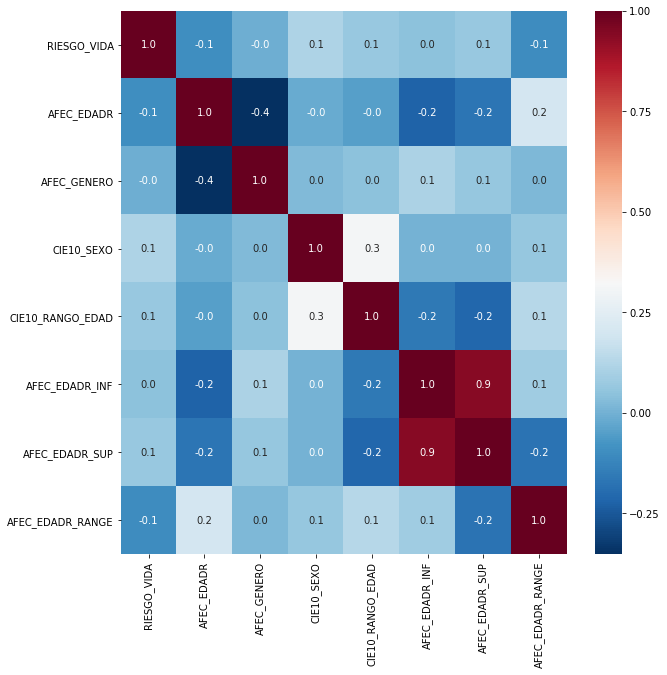

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt
'''
'CAPITULO', 
    'NOMBRE_CAPITULO', 
    'COD_CIE_10_03', 
    'DESCRIPCION_COD_CIE_10_03', 
    'COD_CIE_10_04', 
    'DESCRIPCION_COD_CIE_10_04', 
    'SEXO', 
    'LIMITE_INFERIOR_EDAD', 
    'LIMITE_SUPERIOR_EDAD'
'''
plt.figure(figsize=(10, 10))

ax = sns.heatmap(dataset_cie10[
        ['RIESGO_VIDA',
         'AFEC_EDADR',
         'AFEC_GENERO',
         'CIE10_SEXO',
         'CIE10_RANGO_EDAD',
         'AFEC_EDADR_INF',
         'AFEC_EDADR_SUP',
         'AFEC_EDADR_RANGE',
        ]
    ].corr(), cmap = "RdBu_r", annot=True, fmt='.1f')


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

ax = sns.heatmap(dataset[['RIESGO_VIDA', 'CIE_10', 'IDPATOLOGIA_2', 'PATOLOGIA_1', 'PATOLOGIA_TIPO']].corr(), cmap = "RdBu_r", annot=True, fmt='.1f')

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 720x720 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

dataset['AFECT'] = dataset['AFEC_EDADR'] + dataset['AFEC_GETNICO'] + dataset['AFEC_GENERO'] + dataset['AFEC_PARENTESCO'] + dataset['AFEC_TIPOPER'] + dataset['AFEC_POBESPECIAL']
ax = sns.heatmap(dataset[['RIESGO_VIDA', 'AFECT']].corr(), cmap = "RdBu_r", annot=True, fmt='.1f')

In [ ]:
dataset['RIESGO_VIDA'].plot(kind = 'hist')

In [ ]:
n = 2

